In [1]:
import pandas as pd 

import numpy as np 

import seaborn as sns 

import matplotlib.pyplot as plt 

In [2]:
sns.get_dataset_names() 

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [3]:
titanic = sns.load_dataset('titanic') 

titanic 

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [4]:
titanic.info() 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [5]:
titanic.sex.value_counts() 

sex
male      577
female    314
Name: count, dtype: int64

In [6]:
# 결측치 

titanic.isnull().sum() 

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [7]:
# 타겟 추출 

dfy = titanic.survived.copy() 

dfy 

 

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: survived, Length: 891, dtype: int64

In [8]:
# 피처 추출 

feature_list = ['pclass','sex','age'] 

dfx = titanic[feature_list].copy() 

dfx 

,pclass,sex,age
0,3,male,22.0
1,1,female,38.0
2,3,female,26.0
3,1,female,35.0
4,3,male,35.0
...,...,...,...
886,2,male,27.0
887,1,female,19.0
888,3,female,NaN
889,1,male,26.0


In [9]:
dfx.sex.value_counts() 

sex
male      577
female    314
Name: count, dtype: int64

In [10]:
from sklearn.preprocessing import LabelEncoder 

dfx.sex = LabelEncoder().fit_transform(dfx.sex) 

dfx.sex.value_counts() 

sex
1    577
0    314
Name: count, dtype: int64

In [11]:
dfx.age.isnull().sum() 

np.int64(177)

In [12]:
dfx.age.fillna(dfx.age.mean(), inplace=True) 

dfx.age.isnull().sum() 

C:\Users\최진명\AppData\Local\Temp\ipykernel_35352\1175173303.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  dfx.age.fillna(dfx.age.mean(), inplace=True)


np.int64(0)

In [13]:
dfx.tail() 

,pclass,sex,age
886,2,1,27.000000
887,1,0,19.000000
888,3,0,29.699118
889,1,1,26.000000
890,3,1,32.000000


In [14]:
# pclass의 원핫인코딩 

from sklearn.preprocessing import LabelBinarizer 

 

dfx2 = pd.DataFrame(LabelBinarizer().fit_transform(dfx['pclass']), 

                    columns=['c1','c2','c3'], 

                    index=dfx.index) 

dfx2 

,c1,c2,c3
0,0,0,1
1,1,0,0
2,0,0,1
3,1,0,0
4,0,0,1
...,...,...,...
886,0,1,0
887,1,0,0
888,0,0,1
889,1,0,0


In [15]:
dfx = pd.concat([dfx, dfx2], axis=1) 

dfx 

,pclass,sex,age,c1,c2,c3
0,3,1,22.000000,0,0,1
1,1,0,38.000000,1,0,0
2,3,0,26.000000,0,0,1
3,1,0,35.000000,1,0,0
4,3,1,35.000000,0,0,1
...,...,...,...,...,...,...
886,2,1,27.000000,0,1,0
887,1,0,19.000000,1,0,0
888,3,0,29.699118,0,0,1
889,1,1,26.000000,1,0,0


In [16]:
dfx.drop('pclass', axis=1, inplace=True) 

In [17]:
# 데이터 분할 

from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(dfx, dfy, test_size=0.25, random_state=0) 

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((668, 5), (223, 5), (668,), (223,))

In [18]:
# 의사결정나무 생성 

from sklearn.tree import DecisionTreeClassifier 

 

dtmodel = DecisionTreeClassifier(criterion='gini', 

                                max_depth=3, 

                                min_samples_leaf=5) 

 

 

# 모델 학습 

dtmodel.fit(X_train, y_train) 

dtmodel 

DecisionTreeClassifier(max_depth=3, min_samples_leaf=5)

In [19]:
y_pred = dtmodel.predict(X_test) 

y_pred 

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 1])

In [20]:
pd.crosstab(y_test, y_pred, margins=True) 

col_0,0,1,All
survived,,,
0,119,20,139
1,25,59,84
All,144,79,223


In [21]:
from IPython.display import Image # for visualizing the tree 

import pydotplus 

  

# 의사 결정 나무를 시각화하기 위해서 라이브러리를 임포트합니다. 

from sklearn.tree import export_graphviz 

In [22]:
# 시각화를 위한 함수를 작성한다. 

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save): 

    tree_str = export_graphviz(tree, feature_names=feature_names, class_names=class_names, filled=True, out_file=None) 

    graph = pydotplus.graph_from_dot_data(tree_str) 

    print(graph) 

    graph.write_png(png_file_to_save) 

    return Image(graph.create_png()) 

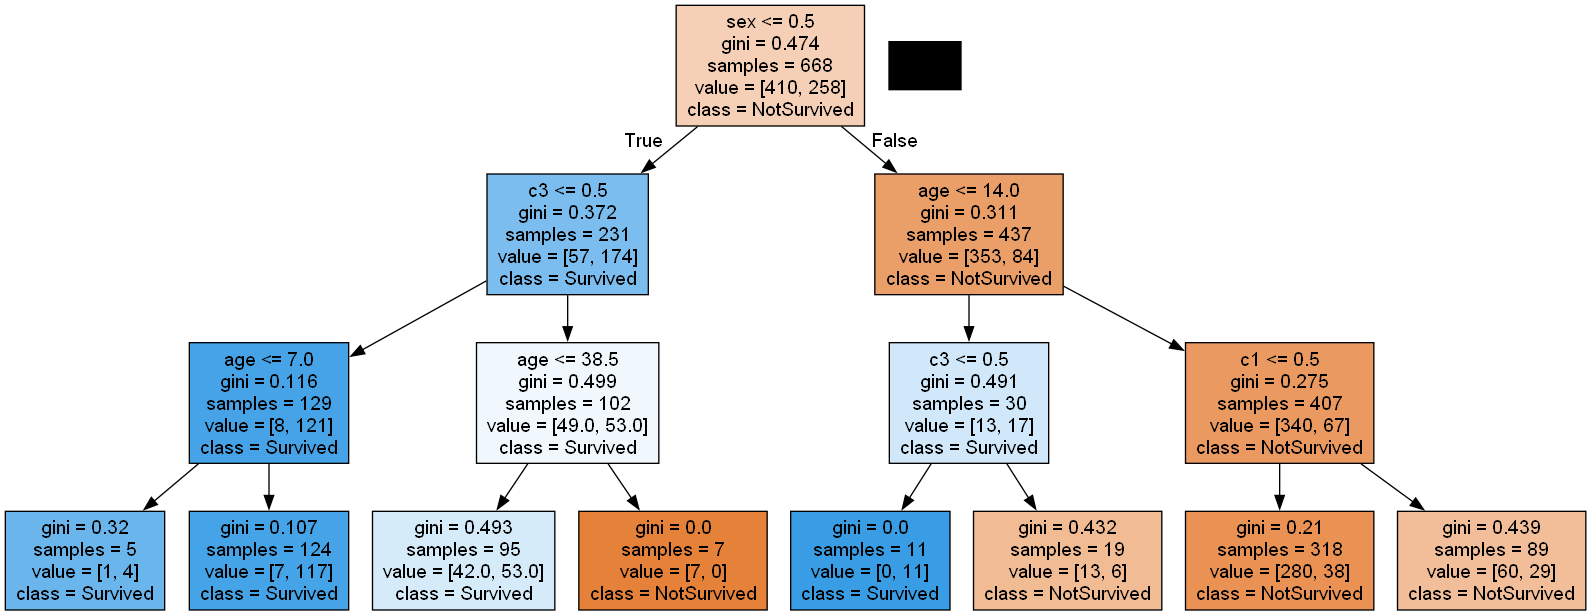

In [23]:
tree_graph_to_png(tree=dtmodel,  feature_names=dfx.columns.values, 

                class_names=['NotSurvived', 'Survived'], 

                png_file_to_save='decision_tree.png') 

|--- feature_0 <= 0.50
|   |--- feature_4 <= 0.50
|   |   |--- feature_1 <= 7.00
|   |   |   |--- class: 1
|   |   |--- feature_1 >  7.00
|   |   |   |--- class: 1
|   |--- feature_4 >  0.50
|   |   |--- feature_1 <= 38.50
|   |   |   |--- class: 1
|   |   |--- feature_1 >  38.50
|   |   |   |--- class: 0
|--- feature_0 >  0.50
|   |--- feature_1 <= 14.00
|   |   |--- feature_4 <= 0.50
|   |   |   |--- class: 1
|   |   |--- feature_4 >  0.50
|   |   |   |--- class: 0
|   |--- feature_1 >  14.00
|   |   |--- feature_2 <= 0.50
|   |   |   |--- class: 0
|   |   |--- feature_2 >  0.50
|   |   |   |--- class: 0



[Text(0.5, 0.875, 'x[0] <= 0.5\ngini = 0.474\nsamples = 668\nvalue = [410, 258]'),
 Text(0.25, 0.625, 'x[4] <= 0.5\ngini = 0.372\nsamples = 231\nvalue = [57, 174]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[1] <= 7.0\ngini = 0.116\nsamples = 129\nvalue = [8, 121]'),
 Text(0.0625, 0.125, 'gini = 0.32\nsamples = 5\nvalue = [1, 4]'),
 Text(0.1875, 0.125, 'gini = 0.107\nsamples = 124\nvalue = [7, 117]'),
 Text(0.375, 0.375, 'x[1] <= 38.5\ngini = 0.499\nsamples = 102\nvalue = [49.0, 53.0]'),
 Text(0.3125, 0.125, 'gini = 0.493\nsamples = 95\nvalue = [42.0, 53.0]'),
 Text(0.4375, 0.125, 'gini = 0.0\nsamples = 7\nvalue = [7, 0]'),
 Text(0.75, 0.625, 'x[1] <= 14.0\ngini = 0.311\nsamples = 437\nvalue = [353, 84]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[4] <= 0.5\ngini = 0.491\nsamples = 30\nvalue = [13, 17]'),
 Text(0.5625, 0.125, 'gini = 0.0\nsamples = 11\nvalue = [0, 11]'),
 Text(0.6875, 0.125, 'gini = 0.432\nsamples = 19\nvalue = [13, 6]'),
 Text(0.875, 0.375, 'x[2

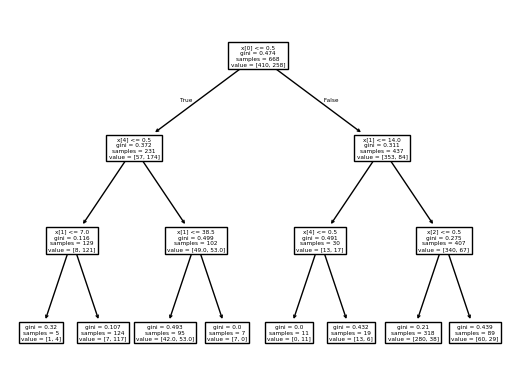

In [24]:
# sklearn 라이브러리로 Decision Tree를 시각화 

from sklearn import tree 

 

## Text Representation 

dtmodel_text = tree.export_text(dtmodel) 

print(dtmodel_text) 

 

tree.plot_tree(dtmodel) 

In [25]:
y_pred = dtmodel.predict(X_test) 

y_pred[:10] 

array([0, 0, 0, 1, 1, 0, 1, 1, 0, 1])

In [26]:
pd.crosstab(y_test, y_pred, margins=True) 

col_0,0,1,All
survived,,,
0,119,20,139
1,25,59,84
All,144,79,223


In [27]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 

 

accuracy_score(y_test,y_pred) 

0.7982062780269058

In [28]:
# 혼동행렬 지표 - 정밀도, 재현율, f1-score, 올바르게 분류된 데이터 수 

print(classification_report(y_test, y_pred)) 

              precision    recall  f1-score   support

           0       0.83      0.86      0.84       139
           1       0.75      0.70      0.72        84

    accuracy                           0.80       223
   macro avg       0.79      0.78      0.78       223
weighted avg       0.80      0.80      0.80       223



In [29]:
from sklearn import metrics 

 

y_test_proba = dtmodel.predict_proba(X_test)[:, 1] 

 

# auroc score 

metrics.roc_auc_score(y_test, y_test_proba) 

np.float64(0.8677201096265843)

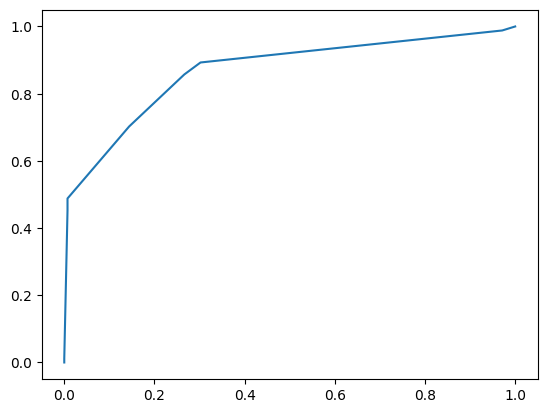

In [30]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, y_test_proba) 

plt.plot(fpr, tpr, label='ROC curve') 

plt.show() 